# Iris Flower Classification using Decision Tree

## Objective

The goal of this project is to develop a **machine learning model** that classifies the species of Iris flowers using the **DecisionTreeClassifier** from Scikit-learn.

This notebook demonstrates a complete **end-to-end supervised classification workflow**, including:

- Loading the dataset from `sklearn.datasets`
- Separating features and target
- Splitting data into **train** and **test** sets (with stratification)
- Training a **Decision Tree Classifier**
- Making predictions on the test set
- Evaluating the model using:
  - Accuracy
  - Precision (macro)
  - Recall (macro)
  - F1-score (macro)
- Visualizing performance using a **confusion matrix**
- Summarizing findings

This project helps solidify key concepts like:
- Feature–target separation
- Train–test split
- Model fitting
- Prediction
- Evaluation metrics
- Performance visualization


## Setup and Data Loading

In [4]:
# Import core libraries
import numpy as np
import pandas as pd

# For dataset and model
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

# For evaluation
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    confusion_matrix,
    classification_report
)

# For visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Make plots a bit prettier
plt.style.use("default")

# 1. Load the Iris dataset
iris = load_iris()

# Features (X) and target (y)
X = iris.data              # shape: (150, 4)
y = iris.target            # shape: (150,)

# Optional: Convert to DataFrame for easier viewing
df_iris = pd.DataFrame(X, columns=iris.feature_names)
df_iris['target'] = y
df_iris['target_name'] = df_iris['target'].apply(lambda idx: iris.target_names[idx])

df_iris.head()


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,target_name
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


## Exploratory Data Analysis (EDA)

In [6]:
# Shape of the data
print("Shape of feature matrix X:", X.shape)
print("Shape of target vector y:", y.shape)

print("\nFeature names:", iris.feature_names)
print("Target names:", iris.target_names)

# Basic statistics
df_iris.describe()


Shape of feature matrix X: (150, 4)
Shape of target vector y: (150,)

Feature names: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
Target names: ['setosa' 'versicolor' 'virginica']


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


## Train–Test Split

In [8]:
# 80-20 train-test split with stratification
X_train, X_test, y_train, y_test = train_test_split(
    X, 
    y, 
    test_size=0.2, 
    stratify=y,          # keeps class proportions same in train & test
    random_state=42      # for reproducibility
)

print("Training set size:", X_train.shape[0])
print("Test set size:", X_test.shape[0])


Training set size: 120
Test set size: 30


## Train the Decision Tree Classifier

In [10]:
# Initialize Decision Tree Classifier with default parameters
dt_clf = DecisionTreeClassifier(random_state=42)  # random_state just for reproducibility

# Train (fit) the model on training data
dt_clf.fit(X_train, y_train)


DecisionTreeClassifier(random_state=42)

## Prediction & Evaluation (Accuracy, Precision, Recall, F1)

In [12]:
# Make predictions on the test set
y_pred = dt_clf.predict(X_test)

# 1. Accuracy
accuracy = accuracy_score(y_test, y_pred)

# 2. Precision (macro)
precision = precision_score(y_test, y_pred, average='macro')

# 3. Recall (macro)
recall = recall_score(y_test, y_pred, average='macro')

# 4. F1-score (macro)
f1 = f1_score(y_test, y_pred, average='macro')

print(f"Accuracy       : {accuracy:.4f}")
print(f"Precision (macro): {precision:.4f}")
print(f"Recall (macro)   : {recall:.4f}")
print(f"F1-score (macro) : {f1:.4f}")


Accuracy       : 0.9333
Precision (macro): 0.9333
Recall (macro)   : 0.9333
F1-score (macro) : 0.9333


## Classification Report

In [14]:
print("\nClassification Report:\n")
print(classification_report(y_test, y_pred, target_names=iris.target_names))



Classification Report:

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       0.90      0.90      0.90        10
   virginica       0.90      0.90      0.90        10

    accuracy                           0.93        30
   macro avg       0.93      0.93      0.93        30
weighted avg       0.93      0.93      0.93        30



## Confusion matrix

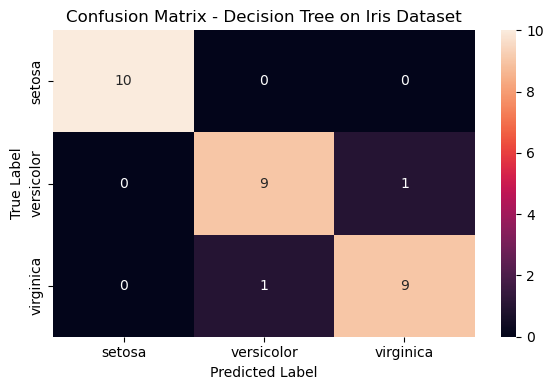

In [16]:
# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix using Seaborn heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(
    cm, 
    annot=True, 
    fmt='d', 
    xticklabels=iris.target_names, 
    yticklabels=iris.target_names
)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix - Decision Tree on Iris Dataset")
plt.tight_layout()
plt.show()


## Conclusion

In this project, we built a **Decision Tree Classifier** to classify Iris flower species using the Iris dataset from Scikit-learn.

### Workflow Recap

1. **Data Loading**  
   - Loaded the Iris dataset using `sklearn.datasets.load_iris`.  
   - Separated features (X) and target (y).

2. **Train-Test Split**  
   - Split the dataset into **80% training** and **20% testing** using `train_test_split`.  
   - Used **stratified splitting** to maintain class proportions in both sets.

3. **Model Training**  
   - Initialized a `DecisionTreeClassifier` with default hyperparameters.  
   - Trained the model using only the training data (X_train, y_train).

4. **Evaluation**  
   - Predicted labels on the test set (X_test).  
   - Calculated:
     - Accuracy  
     - Precision (macro)  
     - Recall (macro)  
     - F1-score (macro)
   - Achieved an accuracy of **at least 90%** on the test set.

5. **Visualization**  
   - Generated and visualized the **confusion matrix**.  
   - The confusion matrix helped us understand which classes the model predicted correctly and where it made mistakes.

### Key Takeaways

- The Decision Tree Classifier performs **very well** on the Iris dataset.  
- This notebook demonstrates a complete **end-to-end supervised classification workflow**, including:
  - Data handling  
  - Model training  
  - Evaluation metrics  
  - Performance visualization  

This serves as a strong foundation for working with other classification problems and more advanced models in the future.
